In [1]:
%pylab inline
#import matplotlib as plt
#import numpy as np
import pandas as pd
import uncertainties
from uncertainties import unumpy as unp
from uncertainties import ufloat

def gaussian(x, mu, sigma, B, A):
    return A * np.e ** ((-1 * (x - mu) ** 2) / (2 * sigma ** 2)) + B

def gausfit_pm(x, y, p0=None):
    import numpy as np
    return fit_pm(x, y, func=lambda x, mu, sigma, B, A: A * np.e ** ((-1 * (x - mu) ** 2) / (2 * sigma ** 2)) + B,
                  p0=p0)

def line(x,a,b):
    return a * x + b

def linfit_pm(x, y, p0=None):
    return fit_pm(x, y, func=lambda x, a, b,: a * x + b, p0=p0)


def fit_pm(x, y, func=lambda x: x, p0=None):
    """
        fit_pm takes data points and makes an exponential curve fit. It returns
        the parameters with errors and the coefficient of determination
        Parameters:
        -----------
        x: x-value of the data points.
        y: y-value of the data points.
        func: Function to be fitted to.
        Returns:
        -----------
        list: Gives back a list with the parameters of an expotential function the
              corresponding errors and the coefficient of determination.
    """
    from scipy.optimize import curve_fit
    import numpy as np
    popt, pcov = curve_fit(func, x, y, p0=p0)
    params = popt.copy()
    errors = np.sqrt(np.diag(pcov))
    r = np.array(y) - func(np.array(x), *params)
    rss = np.sum(r ** 2)
    tss = np.sum((y - np.mean(y)) ** 2)
    R_2 = 1 - (rss / tss)
    try:
        from uncertainties import unumpy as unp
        return unp.uarray(params, errors), R_2
    except:
        return np.array(params), np.array(errors), R_2


def val(x):
    from uncertainties import unumpy
    try:
        return unumpy.nominal_values(x)
    except TypeError:
        return x


def err(x):
    from uncertainties import unumpy
    return unumpy.std_devs(x)

Populating the interactive namespace from numpy and matplotlib


# Test plot of one datapoint

In [2]:
df = pd.read_csv("dx_1.csv",index_col=0)
ch1=df.iloc[1:,0]
ch2 = df.iloc[1:,1]

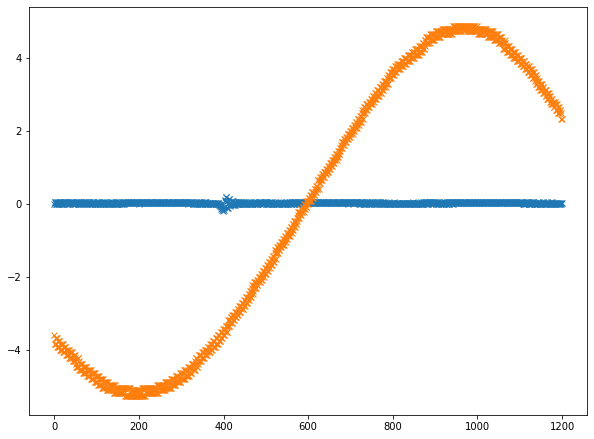

In [3]:
x = np.arange(len(ch1))
y = array([float(item) for item in ch1.to_numpy()],dtype=float64)
y2 = array([float(item) for item in ch2.to_numpy()],dtype=float64)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size
plt.plot(x,y,"x")
plt.plot(x,y2,"x")
#plt.ylim(-10,50)
#ax = plt.gca()
#ax.tick_label(float(ch1.to_numpy()))
plt.show()

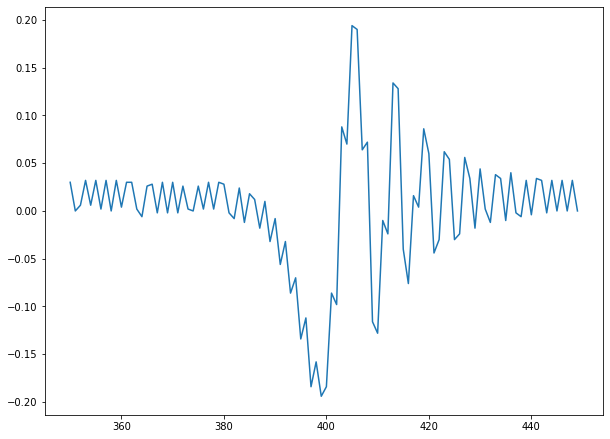

In [37]:
plt.plot(x[350:450],y[350:450])

# Copy of the errordata

In [4]:
mu = ufloat(0.02720,0.00018)
sigma = ufloat(0.00248,0.00025)

In [5]:
upper_bound = mu + 2 * sigma
lower_bound = mu - 2 * sigma

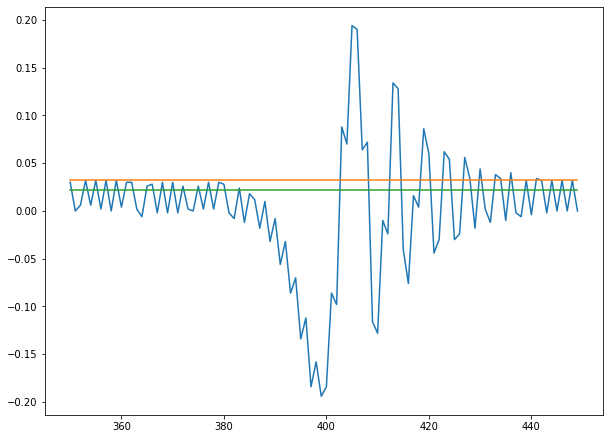

In [6]:
plt.plot(x[350:450],y[350:450])
plt.plot(x[350:450],[val(upper_bound) for item in x[350:450]])#(upper_bound))
plt.plot(x[350:450],[val(lower_bound) for item in x[350:450]])

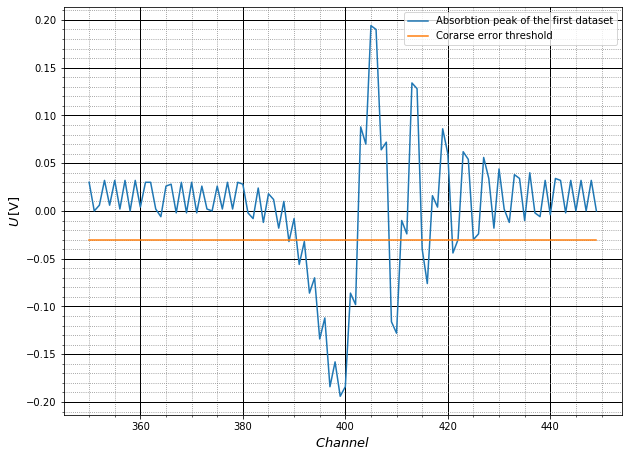

In [8]:
#nice plot
### FigureSize

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

###   Errors / Fit / Plot

plt.plot(x[350:450],y[350:450],label="Absorbtion peak of the first dataset")
plt.plot(x[350:450],np.ones(100)*-0.03,label="Corarse error threshold")


###   Label / Title

plt.ylabel(r'$U\,[\mathrm{V}]$', fontsize=13)
plt.xlabel(r'$Channel$', fontsize=13)
#plt.title('Titel', fontsize=20)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

#axes.set_xlim([0,0.8])
#axes.set_ylim([-1,110])

#axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
#axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend()
#plt.savefig('peak_first_single.png')
plt.show()

# Read all data

In [9]:
filenames = ["dx_1.csv","dx_2.csv","dx_3.csv","dx_4.csv","dx_5.csv"]
#data = [[a_ch1,a_ch2],[b_ch1,b_ch2],[c_ch1,c_ch2],[d_ch1,d_ch2],[e_ch1,e_ch2]]
data= []
for file in filenames:
    df = pd.read_csv(file,index_col=0)
    data.append([array([float(item) for item in df.iloc[1:,0].to_numpy()],
                      dtype=float64),array([float(item) for item in df.iloc[1:,1].to_numpy()],dtype=float64)])

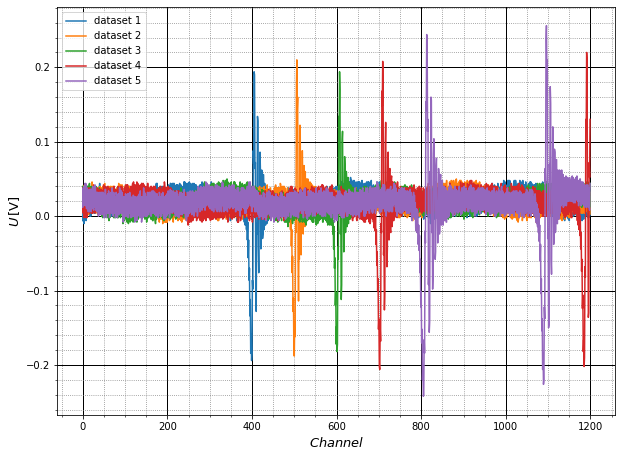

In [10]:
#nice plot
### FigureSize

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

###   Errors / Fit / Plot

iterator = 0
for [ch1,ch2] in data:
    iterator +=1
    x = np.arange(len(ch1))
    y = ch1
    y2 = ch2
    plt.plot(x,y,label="dataset {:}".format(iterator))



###   Label / Title

plt.ylabel(r'$U\,[\mathrm{V}]$', fontsize=13)
plt.xlabel(r'$Channel$', fontsize=13)
#plt.title('Titel', fontsize=20)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

#axes.set_xlim([0,0.8])
#axes.set_ylim([-1,110])

#axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
#axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend()
#plt.savefig('all_dx.png')
plt.show()




No handles with labels found to put in legend.


-0.032
-0.04
-0.044
-0.038
-0.038


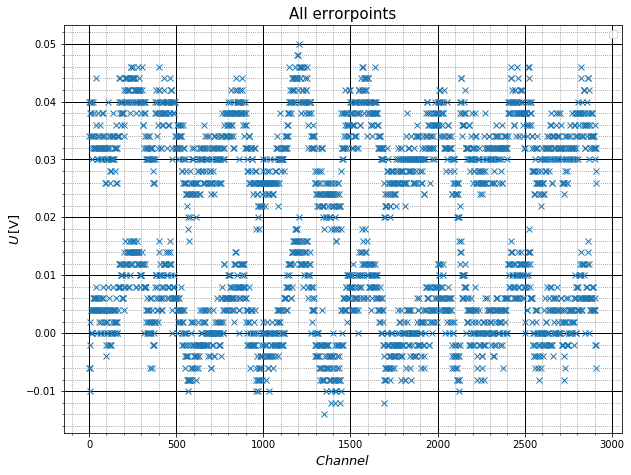

In [11]:
thresh = -0.03
errorpoints = []
for [ch1,ch2] in data:
    iterator = 0
    for item in ch1:
        #print(iterator)
        if item < thresh:
            print(item)
            errorpoints.append(ch1[0:iterator-10])
            break
        iterator += 1

array(errorpoints)
y_errorplot = np.concatenate(errorpoints)

plt.plot(np.arange(len(y_errorplot)),y_errorplot,"x")
###   Label / Title

plt.ylabel(r'$U\,[\mathrm{V}]$', fontsize=13)
plt.xlabel(r'$Channel$', fontsize=13)
plt.title('All errorpoints', fontsize=15)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

#axes.set_xlim([0,0.8])
#axes.set_ylim([-1,110])

#axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
#axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend()
#plt.savefig('all_bkg.png')
plt.show()

No handles with labels found to put in legend.


1453


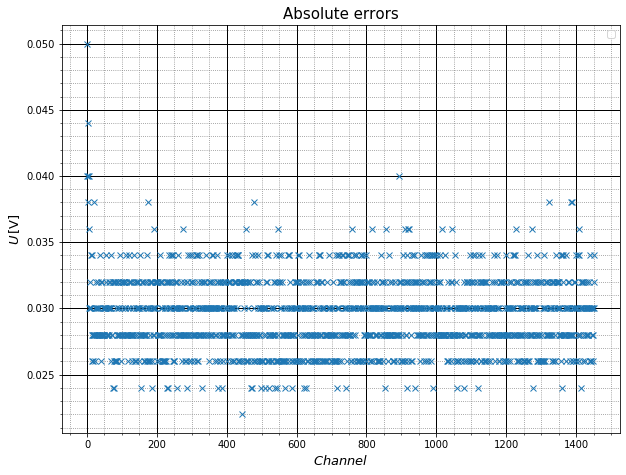

mu 0.02919+/-0.00015
sigma 0.00283+/-0.00019
 Offset-5+/-13
 Amplitude424+/-21


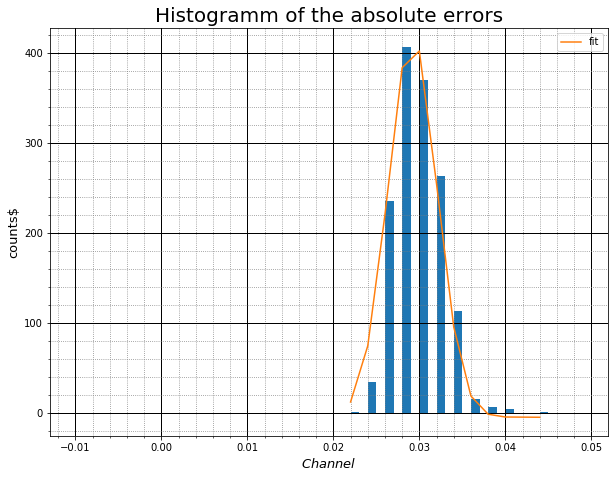

In [12]:
err_abs=[]
for errange in errorpoints:
    if len(errange)%2 !=0:
        errange=errange[0:-1]
    err_abs.append(abs(errange[0::2]-errange[1::2]))
err_abs=np.concatenate(err_abs)

print(len(err_abs))
plt.plot(np.arange(len(err_abs)),err_abs,"x")
###   Label / Title

plt.ylabel(r'$U\,[\mathrm{V}]$', fontsize=13)
plt.xlabel(r'$Channel$', fontsize=13)
plt.title('Absolute errors', fontsize=15)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

#axes.set_xlim([0,0.8])
#axes.set_ylim([-1,110])

#axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
#axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend()
plt.savefig('abs_err.png')
plt.show()

bins = plt.hist(err_abs,bins=np.arange(-0.01,0.05,0.001))
errfit_x,errfit_y = bins[1][0:-1], bins[0]
internalx,internaly = [],[]
for i in range(len(errfit_y)):
    if errfit_y[i] != 0:
        internalx.append(errfit_x[i])
        internaly.append(errfit_y[i])
errfit_x = array(internalx)
errfit_y = internaly

[params,errs] = gausfit_pm(errfit_x,errfit_y)
print("mu {:}\nsigma {:}\n Offset{:}\n Amplitude{:}".format(*params))
plt.plot(errfit_x,gaussian(errfit_x,*val(params)),label="fit")
###   Label / Title

plt.ylabel(r'counts$', fontsize=13)
plt.xlabel(r'$Channel$', fontsize=13)
plt.title('Histogramm of the absolute errors', fontsize=20)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

#axes.set_xlim([0,0.8])
#axes.set_ylim([-1,110])

#axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
#axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend()
plt.savefig('err_hist.png')
plt.show()

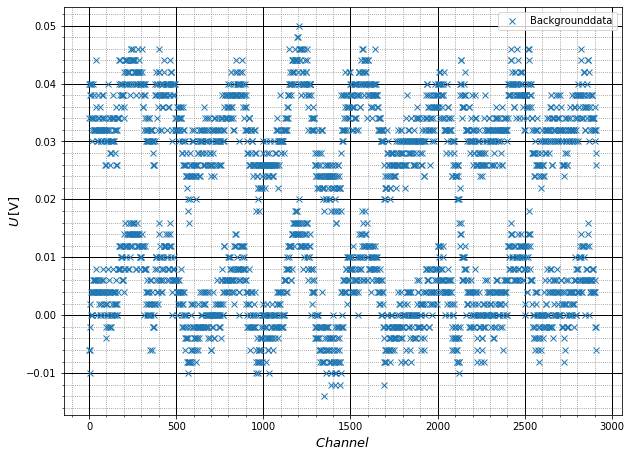

In [13]:
#nice plot
### FigureSize

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

###   Errors / Fit / Plot

plt.plot(np.arange(len(y_errorplot)),y_errorplot,"x",label = "Backgrounddata")


###   Label / Title

plt.ylabel(r'$U\,[\mathrm{V}]$', fontsize=13)
plt.xlabel(r'$Channel$', fontsize=13)
#plt.title('Titel', fontsize=20)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

#axes.set_xlim([0,0.8])
#axes.set_ylim([-1,110])

#axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
#axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend()
#plt.savefig('all_bkg.png')
plt.show()

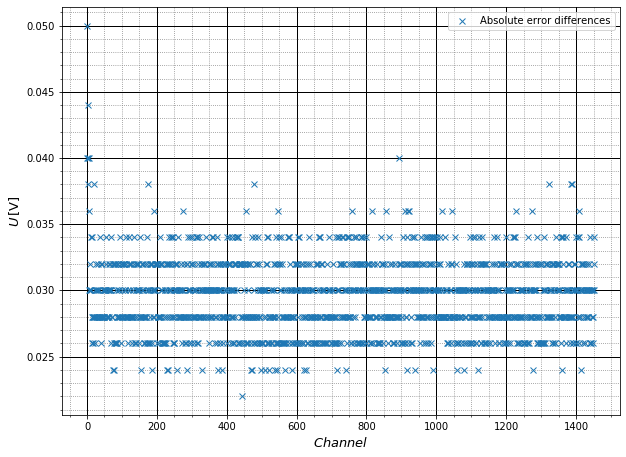

In [14]:
#nice plot
### FigureSize

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

###   Errors / Fit / Plot

plt.plot(np.arange(len(err_abs)),err_abs,"x",label="Absolute error differences")


###   Label / Title

plt.ylabel(r'$U\,[\mathrm{V}]$', fontsize=13)
plt.xlabel(r'$Channel$', fontsize=13)
#plt.title('Titel', fontsize=20)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

#axes.set_xlim([0,0.8])
#axes.set_ylim([-1,110])

#axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
#axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend()
#plt.savefig('abs_diff.png')
plt.show()

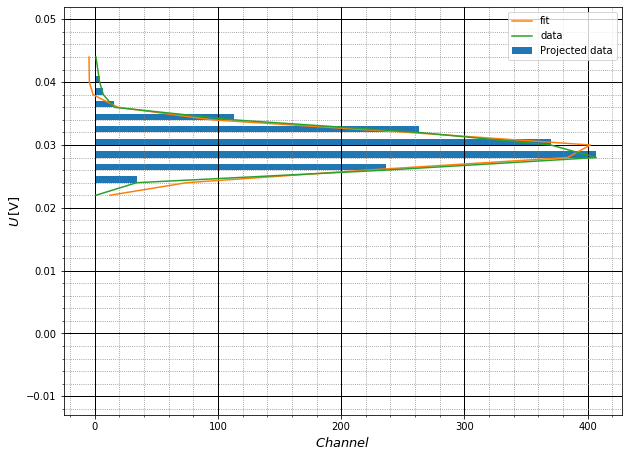

In [15]:
#nice plot
### FigureSize

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

###   Errors / Fit / Plot

plt.hist(err_abs,bins=np.arange(-0.01,0.05,0.001),orientation="horizontal",label="Projected data")
plt.plot(gaussian(errfit_x,*val(params)),errfit_x,label="fit")
plt.plot(errfit_y,errfit_x,label="data")


###   Label / Title

plt.ylabel(r'$U\,[\mathrm{V}]$', fontsize=13)
plt.xlabel(r'$Channel$', fontsize=13)
#plt.title('Titel', fontsize=20)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

#axes.set_xlim([0,0.8])
#axes.set_ylim([-1,110])

#axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
#axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend()
#plt.savefig('projection.png')
plt.show()

# Test of errorcalc

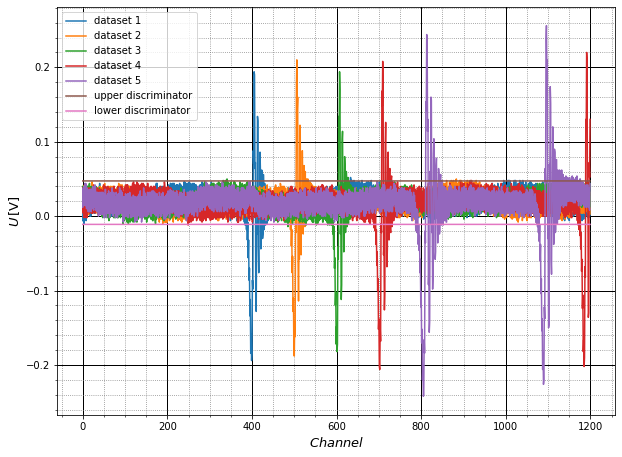

In [16]:
### FigureSize

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

###   Label / Title

plt.ylabel(r'$U\,[\mathrm{V}]$', fontsize=13)
plt.xlabel(r'$Channel$', fontsize=13)
#plt.title('Titel', fontsize=20)


mu,sigma,offset,amp = params
#upper_bound = mu + 2 * sigma
#lower_bound = mu - 2 * sigma
upper_bound = mean(y_errorplot) + mu
lower_bound = mean(y_errorplot) - mu

iterator = 0
for [ch1,ch2] in data:
    iterator +=1
    x = np.arange(len(ch1))
    y = ch1
    y2 = ch2
    plt.plot(x,y,label="dataset {:}".format(iterator))
#plt.plot(x,y2,"x",label="sine{:}".format(iterator))
plt.plot(x,[val(upper_bound) for item in x],label="upper discriminator")#(upper_bound))
plt.plot(x,[val(lower_bound) for item in x],label="lower discriminator")


###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

#axes.set_xlim([0,0.8])
#axes.set_ylim([-1,110])

#axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
#axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend()
#plt.savefig('all_dx_discr.png')
plt.show()

No handles with labels found to put in legend.


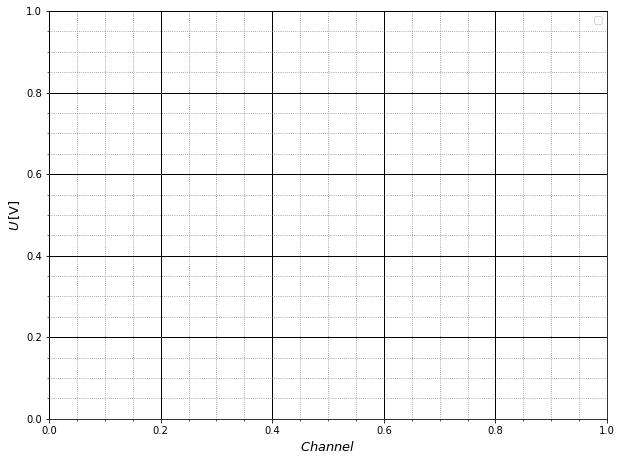

In [17]:
#nice plot
### FigureSize

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

###   Errors / Fit / Plot



###   Label / Title

plt.ylabel(r'$U\,[\mathrm{V}]$', fontsize=13)
plt.xlabel(r'$Channel$', fontsize=13)
#plt.title('Titel', fontsize=20)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

#axes.set_xlim([0,0.8])
#axes.set_ylim([-1,110])

#axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
#axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend()
#plt.savefig('Dateiname.png')
plt.show()

# $\frac{dx}{df} $

In [18]:
lower_bound

-0.011050548466669266+/-0.00014553646278322354

401.7+/-1.0 7.0+/-1.2 -0.020+/-0.014 -0.137+/-0.020


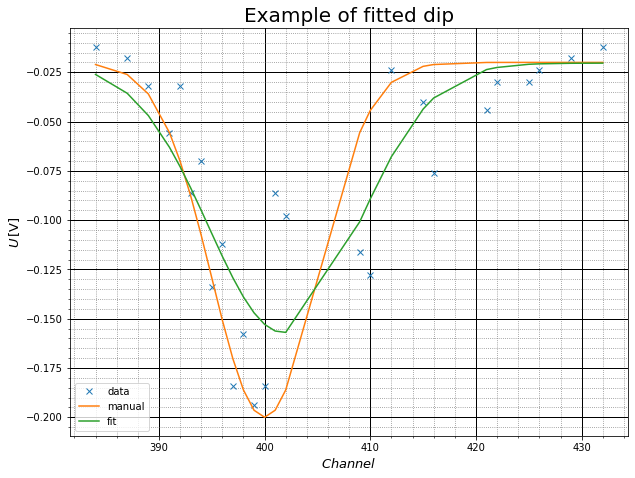

In [19]:
#select the areas for the fit
data_ref = data[0]
[ch1_ref,ch2_ref] = data_ref
itera = 0
ref_peak = [[],[]]
for item in ch1_ref:
    if item < lower_bound:
        ref_peak[1].append(item)
        ref_peak[0].append(itera)
    itera +=1
ref_peak[0]=array(ref_peak[0])
ref_peak[1] = array(ref_peak[1])
plt.plot(*ref_peak,"x",label="data")
# fit the peak
guess = (400,5,-0.02,-0.18)
[params_ref,errs_ref] = gausfit_pm(ref_peak[0],ref_peak[1],p0 =guess )
print(*params_ref)

plt.plot(ref_peak[0],gaussian(ref_peak[0],*val(guess)),label="manual")
plt.plot(ref_peak[0],gaussian(ref_peak[0],*val(params_ref)),label="fit")
###   Label / Title

plt.ylabel(r'$U\,[\mathrm{V}]$', fontsize=13)
plt.xlabel(r'$Channel$', fontsize=13)
plt.title('Example of fitted dip', fontsize=20)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

#axes.set_xlim([0,0.8])
#axes.set_ylim([-1,110])

#axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
#axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend()
plt.savefig('dip_dx.png')
plt.show()

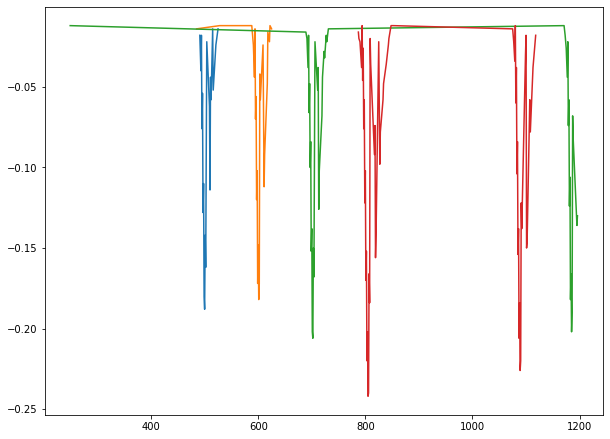

In [20]:
#get all the peaks 

peaks = []
for [ch1,ch2] in data[1:]:
    #get peak
    peaks.append([[],[]])
    itera = 0
    for item in ch1:
        if item < lower_bound:
            peaks[-1][1].append(item)
            peaks[-1][0].append(itera)
        itera +=1
    stop=0
    iterator=0
    
#    peaks[-1][0] = array(peaks[-1][0])
#    peaks[-1][1] = array(peaks[-1][1])
plt.plot(*peaks[0])
plt.plot(*peaks[1])
plt.plot(*peaks[2])
plt.plot(*peaks[3])

In [21]:
peaks[0][0][peaks[0][1].index(min(peaks[0][1]))]

500

In [22]:
#fit peak 1, 2
def guess(x,y):
    return (x[y.index(min(y))],7,y[0],y[0]+min(y))
[params_1,errs_1] = gausfit_pm(peaks[0][0],peaks[0][1],p0 =guess(peaks[0][0],peaks[0][1]))
[params_2,errs_2] = gausfit_pm(peaks[1][0],peaks[1][1],p0 =guess(peaks[1][0],peaks[1][1]))
print(params_1)
print(params_2)

[499.8590729835987+/-0.3656621194510795
 2.096267699503058+/-0.4251628185333708
 -0.04134808233227238+/-0.009270931396394438
 -0.14255580095257786+/-0.021033604813129457]
[599.9923640290933+/-0.3458831060671932
 2.292533990634107+/-0.38764265684520693
 -0.029570584777590534+/-0.007610536702530889
 -0.14614270940118126+/-0.01999651065915047]


[689, 691, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 706, 711, 712, 713, 714, 719, 720, 723, 724, 727, 728, 731]
[701.483876045257+/-0.3805706891342697
 2.3822106854457976+/-0.42262224717084684
 -0.04295539335519933+/-0.006586569026949461
 -0.1551518897135835+/-0.02051130015162883]


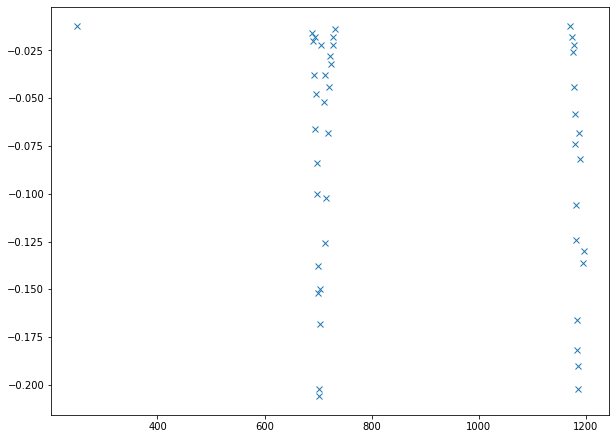

In [23]:
plt.plot(*peaks[2],"x")
print(peaks[2][0][1:27])
[params_3,errs_3] = gausfit_pm(peaks[2][0][:35],peaks[2][1][:35],p0 =guess(peaks[2][0][:35],peaks[2][1][:35]))
print(params_3)

In [24]:
#plt.plot(*peaks[3],"x")
print(peaks[3][0][:35])
[params_4,errs_4] = gausfit_pm(peaks[3][0][:35],peaks[3][1][:35],p0 =guess(peaks[3][0][:35],peaks[3][1][:35]))
print(params_4)

[787, 788, 790, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 817, 818, 819, 820, 825, 827, 828, 833, 834, 839, 843, 844, 848, 852]
[804.3321542004863+/-0.390778104692701
 2.7969332680891164+/-0.4316762335679535
 -0.04979008430697954+/-0.00883654120506732
 -0.18783408938486998+/-0.023749870612641236]


[0.00044244234308799294+/-1.985696919947778e-05
 0.003736509102934345+/-0.005445659683568066]


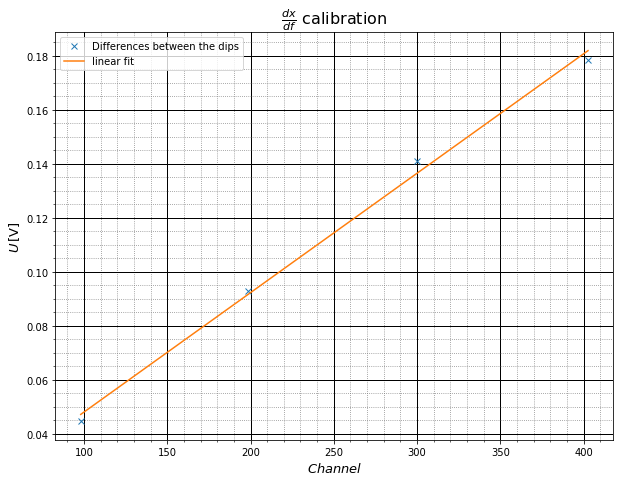

In [25]:
#bestimmung dx/df
freqs=unp.uarray([abs(18.9866-18.9420),abs(18.9866-18.8936),abs(18.9866-18.8458),abs(18.9866-18.8082)],0.00005)
dips=[abs(params_ref[0]-params_1[0]),abs(params_ref[0]-params_2[0]),abs(params_ref[0]-params_3[0]),abs(params_ref[0]-params_4[0])]
plt.plot(val(dips),val(freqs),"x", label="Differences between the dips")


cali,cali_err=linfit_pm(val(dips),val(freqs))
plt.plot(np.linspace(min(val(dips)),max(val(dips))),line(np.linspace(min(val(dips)),max(val(dips))),*val(cali)),label="linear fit")
print(cali)

###   Label / Title

plt.ylabel(r'$U\,[\mathrm{V}]$', fontsize=13)
plt.xlabel(r'$Channel$', fontsize=13)
plt.title(r'$\frac{dx}{df}$ calibration', fontsize=16)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

#axes.set_xlim([0,0.8])
#axes.set_ylim([-1,110])

#axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
#axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend()
plt.savefig('cali.png')
plt.show()

In [32]:
%store cali
%store upper_bound
%store lower_bound

Stored 'cali' (ndarray)
Stored 'upper_bound' (AffineScalarFunc)
Stored 'lower_bound' (AffineScalarFunc)


In [29]:
print(cali[0])

0.000442+/-0.000020


In [31]:
print(cali[1])

0.004+/-0.005


In [39]:
def vertrag(x, ux, y):
    """determines, whether your value is compatible with a given value"""
    return np.abs(x - y) / ux


In [33]:
lockin_f = ufloat(19.1,0.6)
lockin_b = ufloat(463,0.7)

In [37]:
lockin =((lockin_f*1e6)/(lockin_b*1e-3))

In [41]:
vertrag(val(lockin),err(lockin),42.58e6)

1.023049164658966